In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support

In [3]:
data = pd.read_csv('ai4i2020.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# Removing unwanted columns

In [6]:
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [7]:
data.drop(["UDI", "Product ID","RNF","OSF","PWF","HDF","TWF"], axis=1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


In [9]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [10]:
data["Type"].unique()

array(['M', 'L', 'H'], dtype=object)

In [11]:
encoder = LabelEncoder()
data["Type"] = encoder.fit_transform(data["Type"])

In [12]:
data["Type"].unique()

array([2, 1, 0])

<AxesSubplot:>

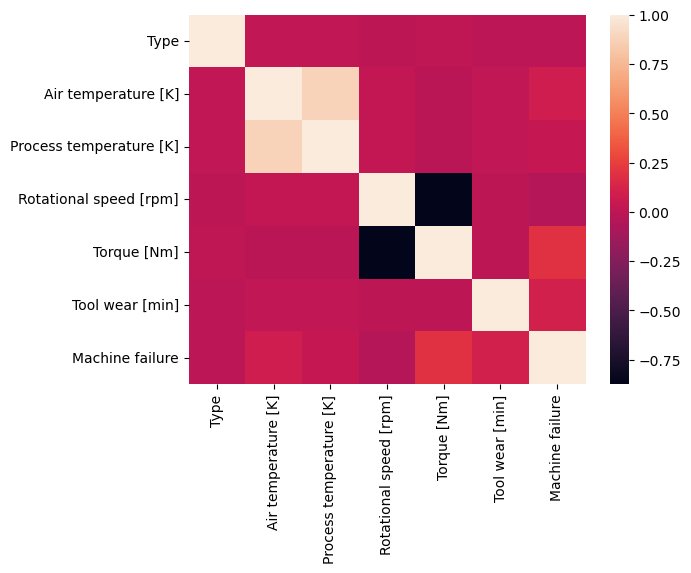

In [13]:
sns.heatmap(data.corr())

In [14]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [15]:
X.shape

(10000, 6)

In [16]:
y.shape

(10000,)

In [17]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

# Naive Bayes Classifier

In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [20]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1925
           1       0.44      0.20      0.28        75

    accuracy                           0.96      2000
   macro avg       0.71      0.60      0.63      2000
weighted avg       0.95      0.96      0.95      2000



In [21]:
metrics.confusion_matrix(y_test,y_pred)

array([[1906,   19],
       [  60,   15]], dtype=int64)

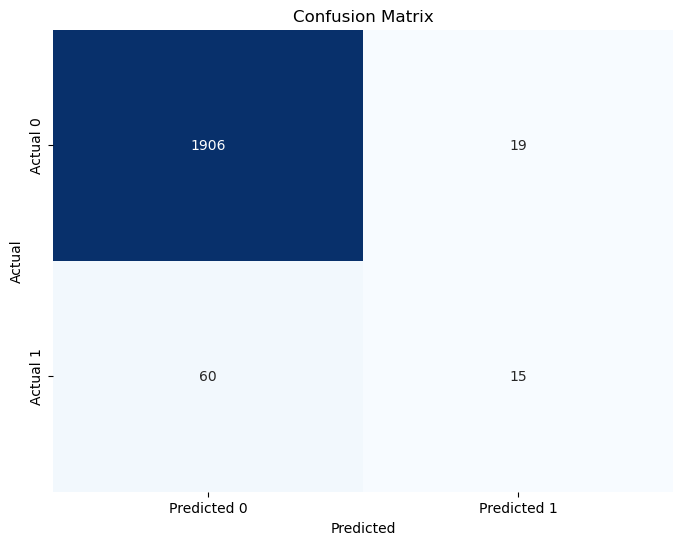

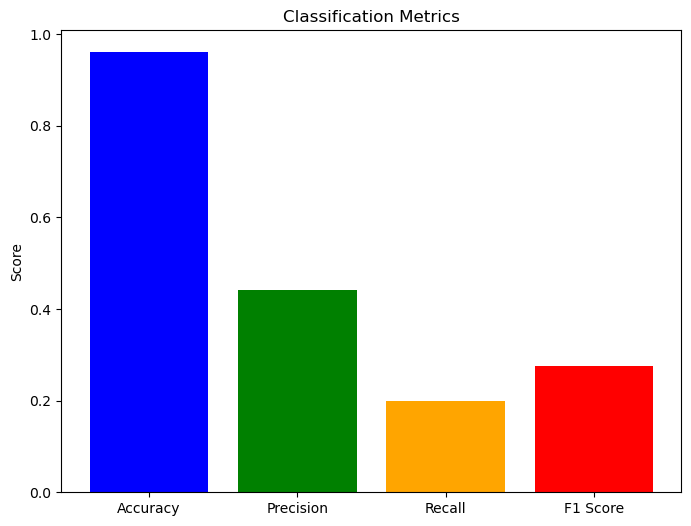

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red'])
ax.set_ylabel('Score')
ax.set_title('Classification Metrics')
plt.show()


# Decision Tree

In [23]:
DecisionTree = DecisionTreeClassifier()
DecisionTree = DecisionTree.fit(X_train, y_train)
y_pred = DecisionTree.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1925
           1       0.62      0.65      0.64        75

    accuracy                           0.97      2000
   macro avg       0.80      0.82      0.81      2000
weighted avg       0.97      0.97      0.97      2000



In [25]:
confusion_matrix(y_test,y_pred)

array([[1895,   30],
       [  26,   49]], dtype=int64)

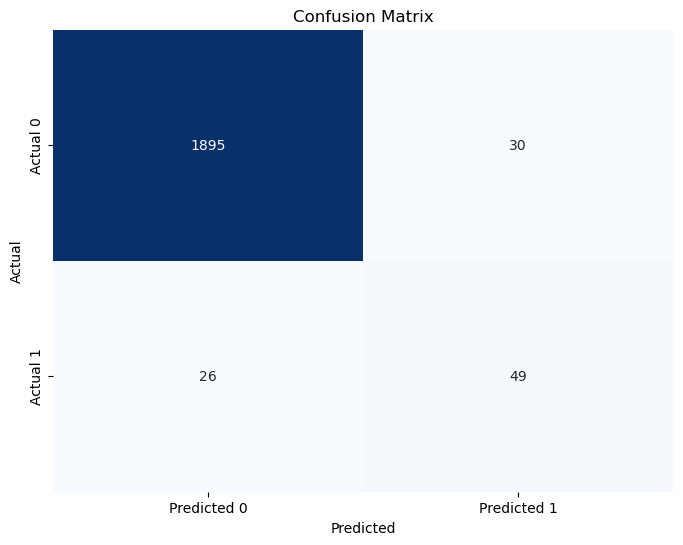

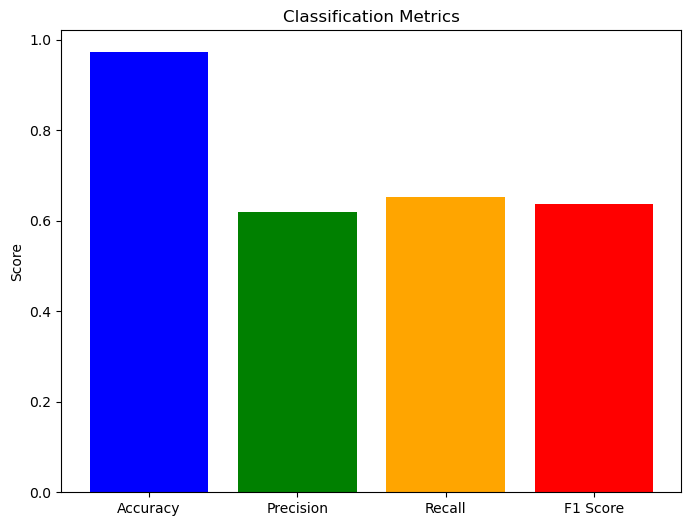

In [26]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red'])
ax.set_ylabel('Score')
ax.set_title('Classification Metrics')
plt.show()


# Random Forest Classifier

In [27]:
RandomForest = RandomForestClassifier(random_state = 0)
RandomForest.fit(X_train,y_train)
y_pred = RandomForest.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1925
           1       0.82      0.61      0.70        75

    accuracy                           0.98      2000
   macro avg       0.90      0.80      0.85      2000
weighted avg       0.98      0.98      0.98      2000



In [29]:
confusion_matrix(y_test,y_pred)

array([[1915,   10],
       [  29,   46]], dtype=int64)

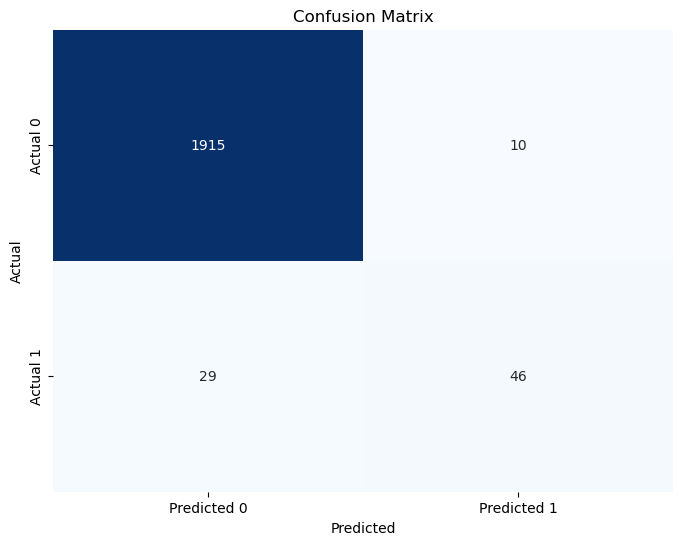

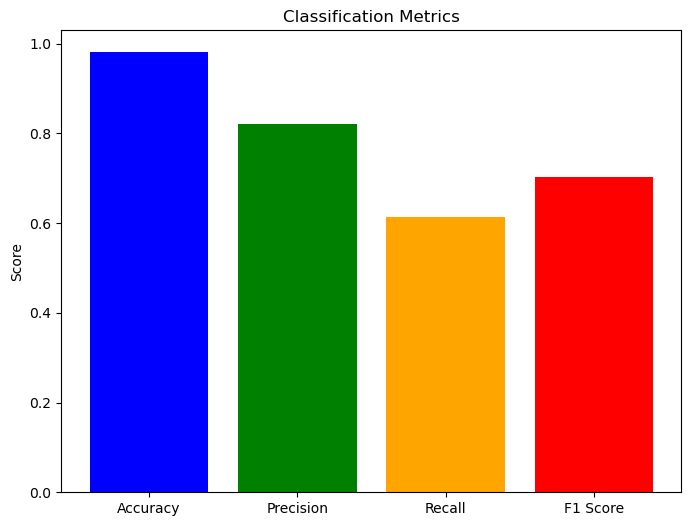

In [30]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red'])
ax.set_ylabel('Score')
ax.set_title('Classification Metrics')
plt.show()


# Logistic Regression

In [31]:
Logistic = LogisticRegression(random_state = 16)
Logistic.fit(X_train,y_train)
y_pred = Logistic.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1925
           1       0.61      0.15      0.24        75

    accuracy                           0.96      2000
   macro avg       0.79      0.57      0.61      2000
weighted avg       0.95      0.96      0.95      2000



In [33]:
confusion_matrix(y_test,y_pred)

array([[1918,    7],
       [  64,   11]], dtype=int64)

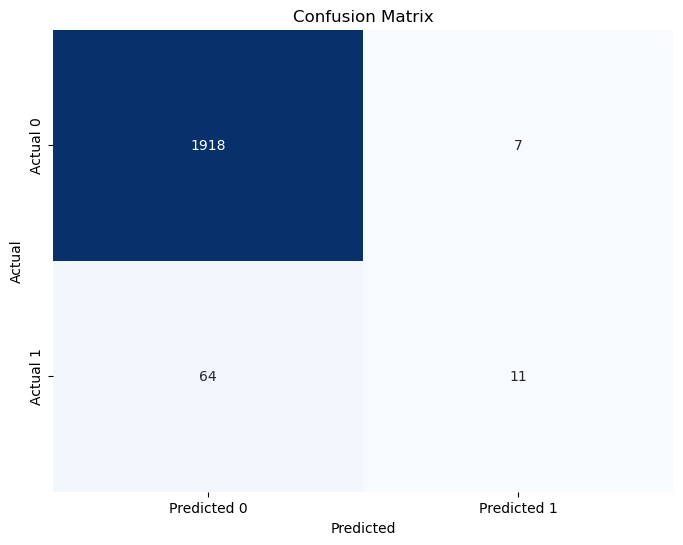

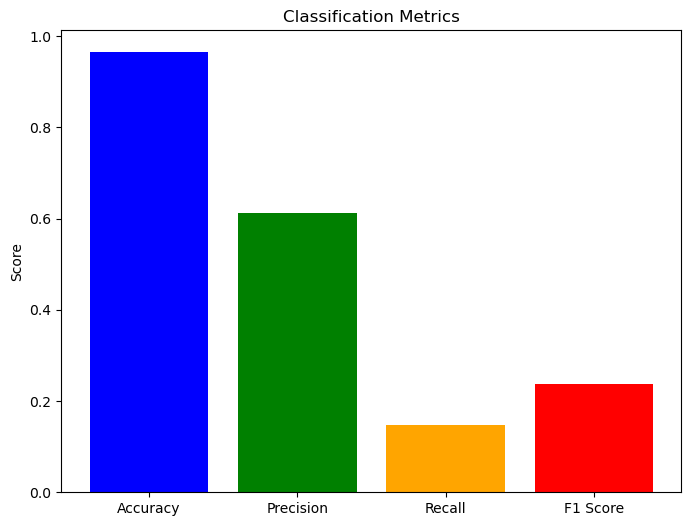

In [34]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red'])
ax.set_ylabel('Score')
ax.set_title('Classification Metrics')
plt.show()


# SVM classification

In [35]:
svm_model = svm.SVC(kernel = 'linear')
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred, zero_division="warn"))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1925
           1       0.00      0.00      0.00        75

    accuracy                           0.96      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.96      0.94      2000



C:\Users\Syfullakhan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Syfullakhan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Syfullakhan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
confusion_matrix(y_test,y_pred)

array([[1925,    0],
       [  75,    0]], dtype=int64)

C:\Users\Syfullakhan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


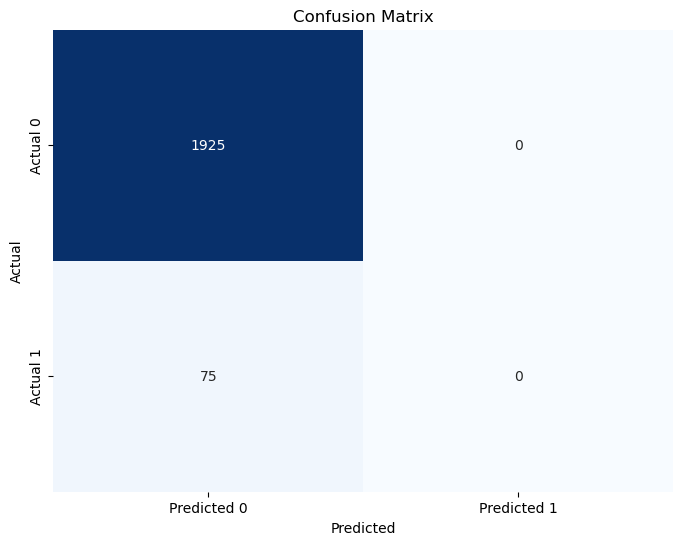

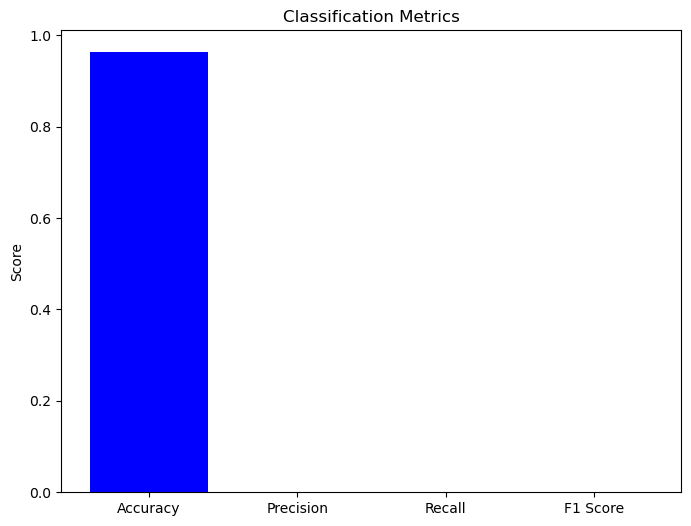

In [38]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red'])
ax.set_ylabel('Score')
ax.set_title('Classification Metrics')
plt.show()


# Gradient Boosting

In [39]:
Gradient = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,random_state=100,max_features = 5)
Gradient.fit(X_train, y_train)
y_pred=Gradient.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1925
           1       0.83      0.57      0.68        75

    accuracy                           0.98      2000
   macro avg       0.91      0.78      0.83      2000
weighted avg       0.98      0.98      0.98      2000



In [41]:
confusion_matrix(y_test,y_pred)

array([[1916,    9],
       [  32,   43]], dtype=int64)

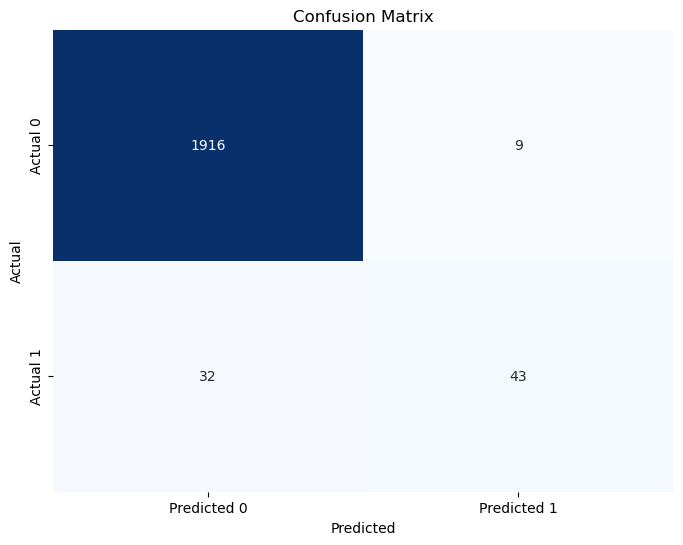

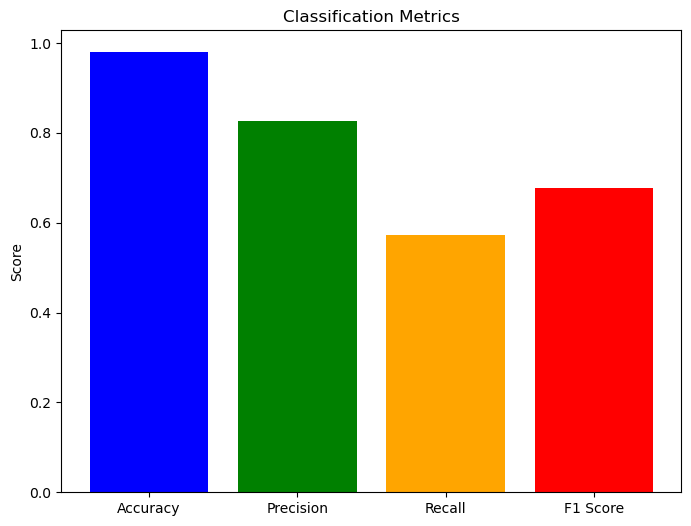

In [42]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red'])
ax.set_ylabel('Score')
ax.set_title('Classification Metrics')
plt.show()
